# Proyecto de Machine Learning con Python
El objetivo de este proyecto es generar un modelo de Machine Learning que apoye la toma de decisiones sobre el lugar más adecuado para la apertura de nuevas tiendas de venta al detalle, en una región geográfica específica, haciendo una predicción del desempeño de esta nueva sucursal.

El modelo hace base en un conjunto de variables geográficas y sociodemográficas de los diferentes sitios que son candidatos para la apertura. Con estas variables como entrada, se desea que el modelo pueda predecir la mejor ubicación para abrir una nueva tienda, en la que se maximice el desempeño; es decir, donde el margen de la venta neta sea mayor.

# Integrantes
- Del Muro Bracho, Rodrigo
- Franco Meléndez Gerardo
- Macías Díaz, Miguel Angel
- Mayén Vázquez, Roberto Carlo
- Romero Arellano, Fernando	

In [ ]:
# Conecta al repositorio de Google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carga librerias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder

In [ ]:
# Asigna directorio de trabajo y dataset
directory ="/content/drive/MyDrive/Proyecto F3M2 - Machine Learning/Data/"
#file = "DataSet Ventas ADF al 24ABR23.csv"
file = 'DataSet Ventas completo 29ABR23.csv'

In [ ]:
# Carga el dataset
df = pd.read_csv(directory+file, header=0)
df.head()

,Id_Tienda,Dia,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Porcentaje_Margen,...,Descripcion_Ciudad,Id_Tipo_Calle,Descricpion_Tipo_Calle,CP,Asentamiento,Latitud,Longitud,Comercios_por_10000,%_Ocupacion_12_o_mas,%_Falta_acceso_alimentacion
0,227,20220101,13,335.581218,2503.056998,2088,60223.2535,38781.96635,21441.28715,0.356030,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
1,227,20220102,0,0.000000,2296.849486,3477,92279.0535,55668.88236,36610.17114,0.396733,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
2,227,20220103,0,0.000000,1496.648722,2287,57433.1035,34253.51394,23179.58956,0.403593,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
3,227,20220104,1,38.098550,956.751624,1448,39028.4135,24143.79344,14884.62006,0.381379,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
4,227,20220105,1,34.330814,833.328276,1244,30844.0935,19240.64886,11603.44464,0.376197,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957


In [ ]:
# Obtener información del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139987 entries, 0 to 139986
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id_Tienda                    139987 non-null  int64  
 1   Dia                          139987 non-null  int64  
 2   Unidades_Devueltas           139987 non-null  int64  
 3   Monto_Devolucion             139987 non-null  float64
 4   Monto_Descuento              139987 non-null  float64
 5   Unidades_Venta_Neta          139987 non-null  int64  
 6   Monto_Venta_Neta             139987 non-null  float64
 7   Monto_Costo_Venta            139987 non-null  float64
 8   Monto_Margen_Venta           139987 non-null  float64
 9   Porcentaje_Margen            139987 non-null  float64
 10  Descripcion_Tienda           139987 non-null  object 
 11  Id_Tipo_Tienda               139987 non-null  int64  
 12  Descripcion_Tipo_Tienda      139987 non-null  object 
 13 

In [ ]:
df.shape 

(139987, 32)

In [ ]:
# Verificar cuantos valores diferentes tienen las variables
result = df.apply(lambda x: x.value_counts(dropna=True, sort=True)).count()
print('Variable              Num. de valores diferentes')
result

Variable              Num. de valores


Id_Tienda                         329
Dia                               455
Unidades_Devueltas                594
Monto_Devolucion                38774
Monto_Descuento                112231
Unidades_Venta_Neta             15548
Monto_Venta_Neta               139153
Monto_Costo_Venta              139970
Monto_Margen_Venta             139984
Porcentaje_Margen              139929
Descripcion_Tienda                329
Id_Tipo_Tienda                      1
Descripcion_Tipo_Tienda             1
Id_Zona_Geografica                  7
Descripcion_Zona_Geografica         7
Id_Formato_Tienda                   7
Descripcion_Formato_Tienda          7
Fecha_Apertura                      1
Num_PisoVentaM2                    97
Id_Estado                           1
Desc_Estado                         1
Id_Ciudad                          11
Descripcion_Ciudad                 11
Id_Tipo_Calle                       7
Descricpion_Tipo_Calle              7
CP                                113
Asentamiento

**Se observa que las variables que tienen un solo valor en sus registros que son:  Id_Tipo_Tienda, Descripcion_Tipo_Tienda, Fecha_Apertura, Id_Estado, Desc_Estado, no son necesarias.**


In [ ]:
# Elimina las variables que tienen un solo valor ( = 1 )en todos sus registros
df_2 = df.drop(['Id_Tipo_Tienda', 'Descripcion_Tipo_Tienda', 'Fecha_Apertura', 'Id_Estado', 'Desc_Estado'], axis=1)

In [ ]:
# Conviertir la variable Asentamiento en categórico
df_2['Asentamiento'] = df_2['Asentamiento'].astype('category')
df_2['Id_Asentamiento'] = df_2['Asentamiento'].cat.codes

In [ ]:
df_2['Asentamiento','Asentamiento']

,Id_Tienda,Dia,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Porcentaje_Margen,...,Id_Tipo_Calle,Descricpion_Tipo_Calle,CP,Asentamiento,Latitud,Longitud,Comercios_por_10000,%_Ocupacion_12_o_mas,%_Falta_acceso_alimentacion,Id_Asentamiento
0,227,20220101,13,335.581218,2503.056998,2088,60223.2535,38781.96635,21441.28715,0.356030,...,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957,15
1,227,20220102,0,0.000000,2296.849486,3477,92279.0535,55668.88236,36610.17114,0.396733,...,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957,15
2,227,20220103,0,0.000000,1496.648722,2287,57433.1035,34253.51394,23179.58956,0.403593,...,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957,15
3,227,20220104,1,38.098550,956.751624,1448,39028.4135,24143.79344,14884.62006,0.381379,...,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957,15
4,227,20220105,1,34.330814,833.328276,1244,30844.0935,19240.64886,11603.44464,0.376197,...,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139982,288,20230327,0,0.000000,298.355304,2979,33808.0835,20550.21953,13257.86397,0.392151,...,7,CALLE,32419,Magnaplex,31.75164,-106.43025,75.59,0.4140,0.085470,82
139983,288,20230328,0,0.000000,481.880682,1547,32816.1935,20006.57848,12809.61502,0.390344,...,7,CALLE,32419,Magnaplex,31.75164,-106.43025,75.59,0.4140,0.085470,82
139984,288,20230329,0,0.000000,418.559364,2193,37204.9835,22886.86334,14318.12016,0.384844,...,7,CALLE,32419,Magnaplex,31.75164,-106.43025,75.59,0.4140,0.085470,82
139985,288,20230330,0,0.000000,635.549760,5192,76795.6835,48184.91608,28610.76742,0.372557,...,7,CALLE,32419,Magnaplex,31.75164,-106.43025,75.59,0.4140,0.085470,82


Se eliminan columnas categóricas para dejar solo variables numéricas.

In [ ]:
df_2 = df_2.drop(columns=['Descripcion_Tienda', 'Descripcion_Tipo_Tienda', 'Descripcion_Zona_Geografica', 'Descripcion_Formato_Tienda', 'Desc_Estado', 'Descripcion_Ciudad', 'Descricpion_Tipo_Calle', 'Asentamiento'])

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139987 entries, 0 to 139986
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id_Tienda                    139987 non-null  int64  
 1   Dia                          139987 non-null  int64  
 2   Unidades_Devueltas           139987 non-null  int64  
 3   Monto_Devolucion             139987 non-null  float64
 4   Monto_Descuento              139987 non-null  float64
 5   Unidades_Venta_Neta          139987 non-null  int64  
 6   Monto_Venta_Neta             139987 non-null  float64
 7   Monto_Costo_Venta            139987 non-null  float64
 8   Monto_Margen_Venta           139987 non-null  float64
 9   Porcentaje_Margen            139987 non-null  float64
 10  Id_Zona_Geografica           139987 non-null  int64  
 11  Id_Formato_Tienda            139987 non-null  int64  
 12  Num_PisoVentaM2              139987 non-null  int64  
 13 

In [ ]:
#Identificar si existen variables con valores NaN
df_2.isna().sum(axis=0)

Id_Tienda                      0
Dia                            0
Unidades_Devueltas             0
Monto_Devolucion               0
Monto_Descuento                0
Unidades_Venta_Neta            0
Monto_Venta_Neta               0
Monto_Costo_Venta              0
Monto_Margen_Venta             0
Porcentaje_Margen              0
Id_Zona_Geografica             0
Id_Formato_Tienda              0
Num_PisoVentaM2                0
Id_Ciudad                      0
Id_Tipo_Calle                  0
CP                             0
Latitud                        0
Longitud                       0
Comercios_por_10000            0
%_Ocupacion_12_o_mas           0
%_Falta_acceso_alimentacion    0
Id_Asentamiento                0
dtype: int64

**No se encontraron valores NaN**

In [ ]:
# Identifica las variables categoricas
categorical_col = []
i = 0
for column in df_2.columns:
  if df_2[column].dtype == object and len(df_2[column].unique()) < 50:
      categorical_col.append(column)
      print("Variable Categórica:", df_2.columns.values[i],"  Num. de valores: ",len(df_2[column].unique()))
  i= i +1 
#categorical_col

In [ ]:
# Aplicar One-Hot Encoding (variable categórica a valores numéricos) para que los modelos trabajen sin problema (Pendiente)
# le = LabelEncoder()
# t1 = le.fit_transform(df_2[])
# np.unique(t1)  # Muestra cuantos valores diferentes se asignaron
# pd.concat([df, dummies], axis=1).drop(columns=["sex"])

In [ ]:
# Funcion que escala (normaliza) los datos del Dataset
def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

In [ ]:
# Escalar los datos numericos del Dataset (Pendiente)
df_escalado = escalar_a_01(df_2)

<Axes: >

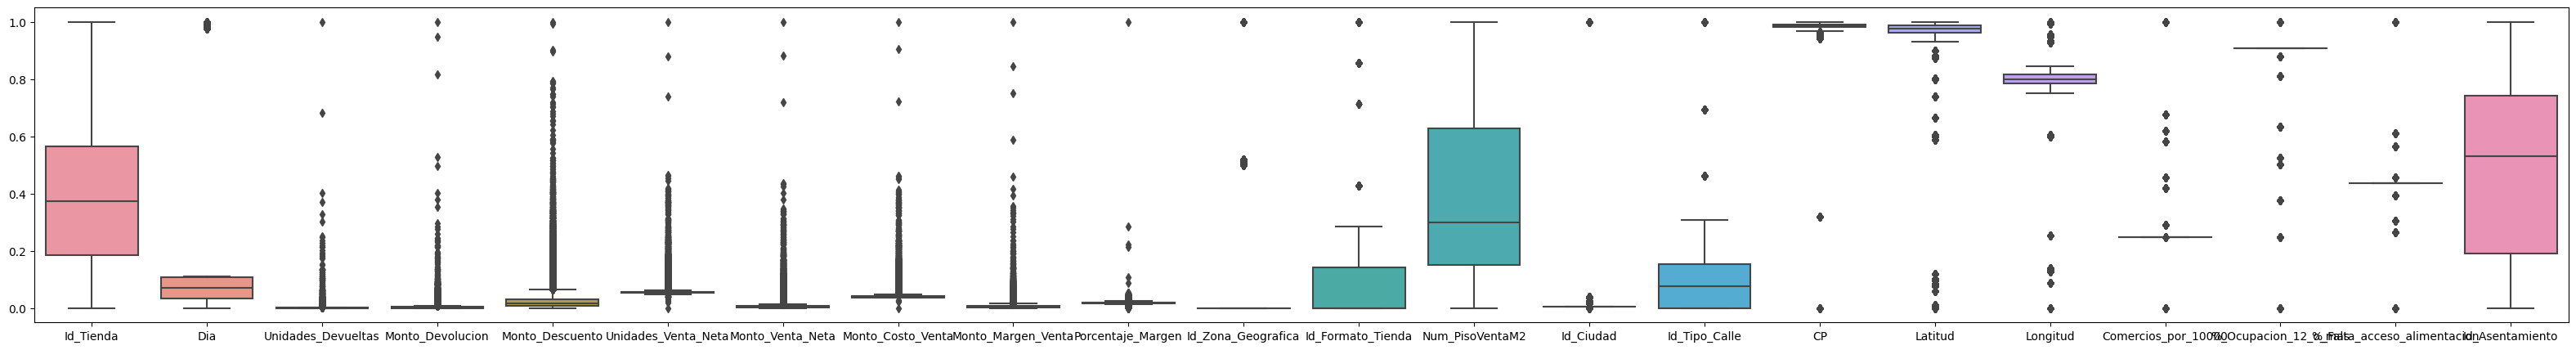

In [ ]:
# Grafica boxplot para observar datos atipicos en cada una de las variables numericas
fig = plt.figure(figsize=(40, 5))
ax = fig.add_subplot()
sns.boxplot(data=df_escalado, ax=ax)

In [ ]:
# Se redondea al entero de arriba (Pendiente)
# df_financiero_2 = round(df_financiero)
# df_financiero_2

# **Árbol de Decisión**

In [ ]:
from IPython.display import Image
import pydot
from six import StringIO
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


In [ ]:
def calcular_precision(TP, TN, FP, FN):
    precision = (TP + TN) / (TP + TN + FP + FN)
    precision = precision * 100
    return precision

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [ ]:
df['Porcentaje_Margen'].describe()

count    139987.000000
mean          0.339138
std           0.094460
min           0.008257
25%           0.316167
50%           0.342260
75%           0.371736
max          18.093986
Name: Porcentaje_Margen, dtype: float64

In [ ]:
df_escalado['Porcentaje_Margen'].describe()

count    139987.000000
mean          0.018295
std           0.005223
min           0.000000
25%           0.017025
50%           0.018468
75%           0.020098
max           1.000000
Name: Porcentaje_Margen, dtype: float64

<Axes: >

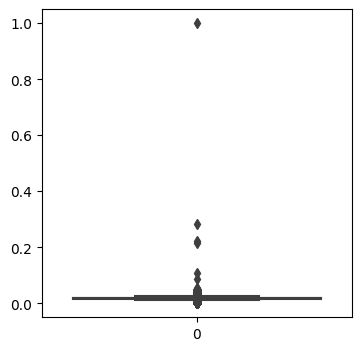

In [ ]:
# Grafica boxplot para observar datos atipicos en cada una de las variables numericas
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
sns.boxplot(data=df_escalado['Porcentaje_Margen'], ax=ax)

In [ ]:
le = LabelEncoder()

In [ ]:
categorical_col = []
for column in df_escalado.columns:
  if df_escalado[column].dtype == object and len(df_escalado[column].unique()) < 50:
    categorical_col.append(column)

categorical_col

[]

In [ ]:
# Convirtiendo la variable numérica a categórica en 5 bins
df_escalado['Porcentaje_Margen'] = pd.cut(df_escalado['Porcentaje_Margen'], 5, labels=['muy bajo', 'bajo', 'medio', 'alto', 'muy alto'])

In [ ]:
for column in categorical_col:
  df_escalado[column] = le.fit_transform(df[column])

# Convertir variable categórica representada por strings a variable categórica representada por números discretos
df_escalado['Porcentaje_Margen'] = le.fit_transform(df_escalado['Porcentaje_Margen'])

In [ ]:
df_escalado.head()

,Id_Tienda,Dia,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Porcentaje_Margen,...,Num_PisoVentaM2,Id_Ciudad,Id_Tipo_Calle,CP,Latitud,Longitud,Comercios_por_10000,%_Ocupacion_12_o_mas,%_Falta_acceso_alimentacion,Id_Asentamiento
0,0.543269,0.000000,0.000766,0.005122,0.035511,0.053949,0.004494,0.039169,0.006626,2,...,0.180942,0.036096,0.0,0.996862,0.664799,0.763757,0.581693,0.878014,0.609669,0.094937
1,0.543269,0.000098,0.000000,0.000000,0.032658,0.056243,0.006886,0.040781,0.011314,2,...,0.180942,0.036096,0.0,0.996862,0.664799,0.763757,0.581693,0.878014,0.609669,0.094937
2,0.543269,0.000196,0.000000,0.000000,0.021589,0.054278,0.004286,0.038736,0.007163,2,...,0.180942,0.036096,0.0,0.996862,0.664799,0.763757,0.581693,0.878014,0.609669,0.094937
3,0.543269,0.000293,0.000059,0.000581,0.014120,0.052892,0.002913,0.037771,0.004600,2,...,0.180942,0.036096,0.0,0.996862,0.664799,0.763757,0.581693,0.878014,0.609669,0.094937
4,0.543269,0.000391,0.000059,0.000524,0.012413,0.052556,0.002302,0.037302,0.003586,2,...,0.180942,0.036096,0.0,0.996862,0.664799,0.763757,0.581693,0.878014,0.609669,0.094937


In [ ]:
X = df_escalado.drop(columns='Porcentaje_Margen', axis=1)
y = df_escalado['Porcentaje_Margen']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
tree_clf = DecisionTreeClassifier()

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
(TN, FP, FN, TP) = matrix.ravel()

In [ ]:
calcular_precision(TP, TN, FP, FN)

99.99523775507775

In [ ]:
calcular_sensibilidad(TP, TN, FP, FN)

99.99761882084009

In [ ]:
calcular_especificidad(TP, TN, FP, FN)

0.0

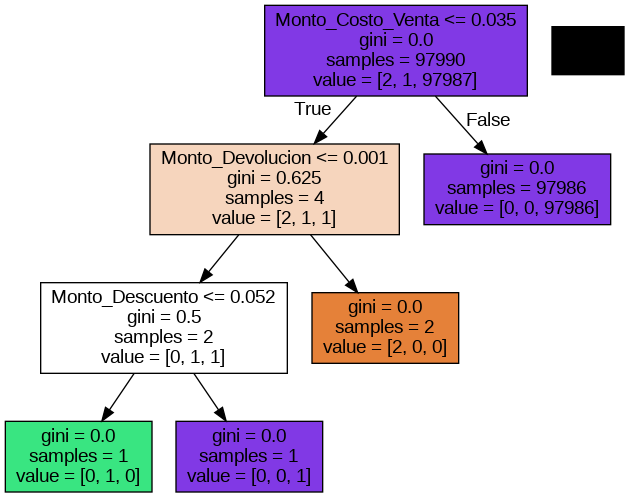

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=X.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# **Árboles y Bosques**

## Carga de datos

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto F3M2 - Machine Learning/Data/DataSet Ventas completo 29ABR23.csv')

## Exploración de datos

In [ ]:
df.shape

(139987, 32)

In [ ]:
df.head()

,Id_Tienda,Dia,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Porcentaje_Margen,...,Descripcion_Ciudad,Id_Tipo_Calle,Descricpion_Tipo_Calle,CP,Asentamiento,Latitud,Longitud,Comercios_por_10000,%_Ocupacion_12_o_mas,%_Falta_acceso_alimentacion
0,227,20220101,13,335.581218,2503.056998,2088,60223.2535,38781.96635,21441.28715,0.356030,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
1,227,20220102,0,0.000000,2296.849486,3477,92279.0535,55668.88236,36610.17114,0.396733,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
2,227,20220103,0,0.000000,1496.648722,2287,57433.1035,34253.51394,23179.58956,0.403593,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
3,227,20220104,1,38.098550,956.751624,1448,39028.4135,24143.79344,14884.62006,0.381379,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
4,227,20220105,1,34.330814,833.328276,1244,30844.0935,19240.64886,11603.44464,0.376197,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957


In [ ]:
df.dtypes

Id_Tienda                        int64
Dia                              int64
Unidades_Devueltas               int64
Monto_Devolucion               float64
Monto_Descuento                float64
Unidades_Venta_Neta              int64
Monto_Venta_Neta               float64
Monto_Costo_Venta              float64
Monto_Margen_Venta             float64
Porcentaje_Margen              float64
Descripcion_Tienda              object
Id_Tipo_Tienda                   int64
Descripcion_Tipo_Tienda         object
Id_Zona_Geografica               int64
Descripcion_Zona_Geografica     object
Id_Formato_Tienda                int64
Descripcion_Formato_Tienda      object
Fecha_Apertura                  object
Num_PisoVentaM2                  int64
Id_Estado                        int64
Desc_Estado                     object
Id_Ciudad                        int64
Descripcion_Ciudad              object
Id_Tipo_Calle                    int64
Descricpion_Tipo_Calle          object
CP                       

## Limpieza del dataset

In [ ]:
df['Asentamiento'] = df['Asentamiento'].astype('category')
df['Id_Asentamiento'] = df['Asentamiento'].cat.codes

In [ ]:
df = df.drop(columns=['Descripcion_Tienda', 'Descripcion_Tipo_Tienda', 'Descripcion_Zona_Geografica', 'Descripcion_Formato_Tienda', 'Desc_Estado', 'Descripcion_Ciudad', 'Descricpion_Tipo_Calle', 'Asentamiento'])

In [ ]:
df = df.drop(columns=['Fecha_Apertura', 'Id_Estado', 'Id_Tipo_Tienda'])

In [ ]:
df.dtypes

Id_Tienda                        int64
Dia                              int64
Unidades_Devueltas               int64
Monto_Devolucion               float64
Monto_Descuento                float64
Unidades_Venta_Neta              int64
Monto_Venta_Neta               float64
Monto_Costo_Venta              float64
Monto_Margen_Venta             float64
Porcentaje_Margen              float64
Id_Zona_Geografica               int64
Id_Formato_Tienda                int64
Num_PisoVentaM2                  int64
Id_Ciudad                        int64
Id_Tipo_Calle                    int64
CP                               int64
Latitud                        float64
Longitud                       float64
Comercios_por_10000            float64
%_Ocupacion_12_o_mas           float64
%_Falta_acceso_alimentacion    float64
Id_Asentamiento                  int16
dtype: object

In [ ]:
def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado